In [2]:
%pwd  #look at the current work dir
%cd  /eris/u/jschubert/optimism_transformer/
import sys
import pandas as pd
sys.path.append('src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/eris/u/jschubert/optimism_transformer


In [3]:
#file = '/eris/scratch/jschubert/transformer/agency_blockwise_trained/rw_fitting.csv'
file = '/u/jschubert/optimism_transformer/palminteri/rw_fitting_3models.csv'
full_df = pd.read_csv(file)
full_df.head()
name='humans'

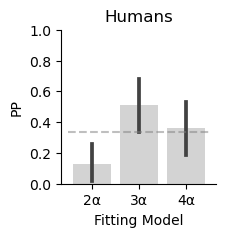

In [11]:
df = full_df
p = df[df['meta_rl_model'] == 'humans']
pivoted = p.pivot(index='part_run', columns='fitting_model', values='bic')

# calculate PP
bic_diff = pivoted.sub(pivoted.min(axis=1), axis=0)
unnormalized_pp = np.exp(-0.5 * bic_diff)
normalized_pp = unnormalized_pp.div(unnormalized_pp.sum(axis=1), axis=0)

# convert to plotting format
reset = normalized_pp.reset_index()
reset.head()
melt = reset.melt(id_vars='part_run', 
            value_vars=reset.columns[1:],
            var_name='fitting_model',
            value_name='bic')


plt.figure(figsize=(2,2))
plt.ylim(0, 1)

sns.barplot(data=melt, x='fitting_model', y='bic', color='lightgrey')
sns.despine()

# change labels to 2α 3α 4α
labels = ['2α', '3α', '4α']
plt.xticks(np.arange(3), labels)
plt.xlabel('Fitting Model')
plt.ylabel('PP')
plt.title('Humans')

plt.hlines(y=melt.mean(numeric_only=True)['bic'], xmin=-0.5, xmax=2.5, linestyle='--', alpha=0.5, color='grey')

In [8]:
fit = pd.concat([normalized_pp.mean().round(2), normalized_pp.sem().round(3)], axis=1, keys=['mean', 'sem'])

fit.loc['mean', 'mean'] = melt.mean(numeric_only=True)['bic']
fit

,mean,sem
fitting_model,,
Model_2alpha,0.130000,0.061
Model_3alpha,0.510000,0.090
Model_4alpha,0.360000,0.089
mean,0.333333,NaN


Text(0.5, 1.0, 'humans - Model 4 alpha')

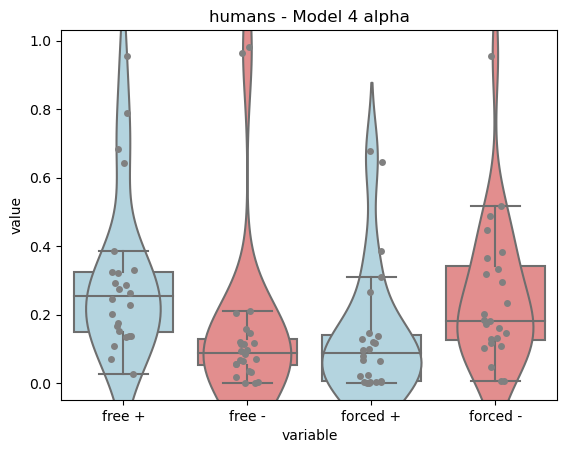

In [15]:
df = full_df[(full_df['meta_rl_model'] == name) & (full_df['fitting_model'] == 'Model_4alpha')]

plot_df = pd.DataFrame({'free +': df.alpha_free_pos, 
                        'free -': df.alpha_free_neg, 
                        'forced +': df.alpha_forced_pos, 
                        'forced -': df.alpha_forced_neg})

plt_df = plot_df.melt()

palette = ['lightblue', 'lightcoral', 'lightblue', 'lightcoral']

sns.violinplot(x="variable", y="value", data=plt_df, palette=palette, inner=None)
sns.stripplot(x="variable", y="value", data=plt_df, jitter=True, color='grey')
sns.boxplot(x="variable", y="value", data=plt_df, palette=palette, showfliers=False)

plt.title(f'{name} - Model 4 alpha')

In [16]:
import scipy.stats as stats

res, pvalue = stats.ttest_rel(plot_df['free +'], plot_df['free -'])
res1, pvalue1 = stats.ttest_rel(plot_df['forced +'], plot_df['forced -'])

print(f'pvalue for post-free difference: {pvalue:.2f}')
print(f'pvalue for post-forced difference: {pvalue1:.4f}')

pvalue for post-free difference: 0.02
pvalue for post-forced difference: 0.0544


Text(0.5, 1.0, 'humans - Model 3 alpha')

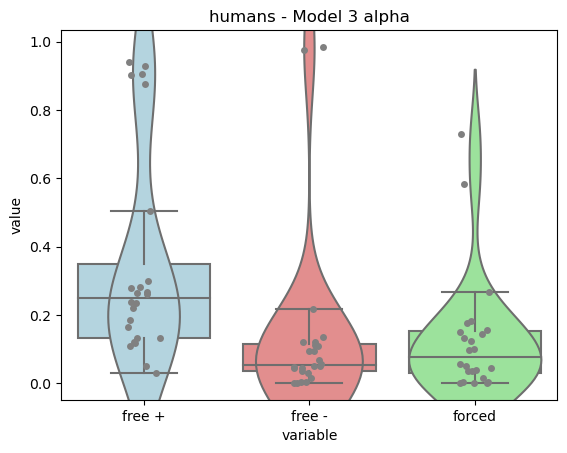

In [13]:
df = full_df[(full_df['meta_rl_model'] == name) & (full_df['fitting_model'] == 'Model_3alpha')]

plot_df = pd.DataFrame({'free +': df.alpha_free_pos, 
                        'free -': df.alpha_free_neg, 
                        'forced': df.alpha_forced})

plt_df = plot_df.melt()

palette = ['lightblue', 'lightcoral', 'lightgreen']

sns.violinplot(x="variable", y="value", data=plt_df, palette=palette, inner=None)
sns.stripplot(x="variable", y="value", data=plt_df, jitter=True, color='grey')
sns.boxplot(x="variable", y="value", data=plt_df, palette=palette, showfliers=False)

plt.title(f'{name} - Model 3 alpha')